# Fantasy Premier League

## Hall of Fame Managers

Analysing the FPL Season of LiveFPL's list of TOP 1000 manager's.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from highlight_text import fig_text
mpl.rcParams['figure.dpi'] = 400

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

In [3]:
chips = pd.DataFrame(
    list(pd.read_json('../data/fpl_official/2021-22/season/managers_hof.json', orient='index')['chips']),
    columns=['wildcard_1', 'freehit', 'bboost', 'wildcard_2', 'threexc'],
    index=pd.read_json('../data/fpl_official/2021-22/season/managers_hof.json', orient='index').index
    )

In [4]:
table = pd.DataFrame(
    index=np.arange(1, 39),
    columns=['wildcard_1', 'freehit', 'bboost', 'wildcard_2', 'threexc', 'Rolled', 'Hits', 'Rank'],
)

for chip in ['wildcard_1', 'freehit', 'bboost', 'wildcard_2', 'threexc']:
    for gw in range(1, 39):
        table.loc[gw, chip] = np.sum(chips[chip] == gw)

table.loc[:, 'wildcard_1'] = table.loc[:, 'wildcard_1'] + table.loc[:, 'wildcard_2']
table = table.drop(['wildcard_2'], 1)
table = table.rename(columns={
    'wildcard_1': 'Wildcard',
    'freehit': 'Freehit',
    'bboost': 'Bench boost',
    'threexc': 'Triple Cap',
})

In [5]:
hit_points = -pd.read_csv('../data/fpl_official/2021-22/season/hit_points_hof.csv')
rolled = pd.read_csv('../data/fpl_official/2021-22/season/rolled_hof.csv')
overall_rank = pd.json_normalize(
    pd.read_json(
        '../data/fpl_official/2021-22/season/managers_hof.json',
        orient='index')
        ['overall_rank'])

for gw in range(1, 39):
    table.loc[gw, 'Hits'] = np.sum(hit_points[str(gw)] > 0)
    table.loc[gw, 'Rolled'] = np.sum(rolled[str(gw)])
    try:
        table.loc[gw, 'Rank'] = np.mean(overall_rank[str(gw)])
    except:
        table.loc[gw, 'Rank'] = 0

table = table.fillna(0)
table = table.astype('int32')

In [6]:
from matplotlib.colors import ListedColormap

N = 2560

purple = np.ones((N, 4))
purple[:, 0] = np.linspace(98/256, 1, N)
purple[:, 1] = np.linspace(71/256, 1, N)
purple[:, 2] = np.linspace(170/256, 1, N)
purple_cmp = ListedColormap(purple)

In [7]:
colours = np.zeros((38, table.columns.shape[0], 4))

for i in range(table.columns.shape[0]):
    colours[:, i, :] = ListedColormap(
        purple_cmp(np.linspace(1, 0, 128)),
        name='red')(
            plt.Normalize(
                table.values[:, i].min()-1,
                table.values[:, i].max()+1
                )(
                    np.around(table.values[:, i])))

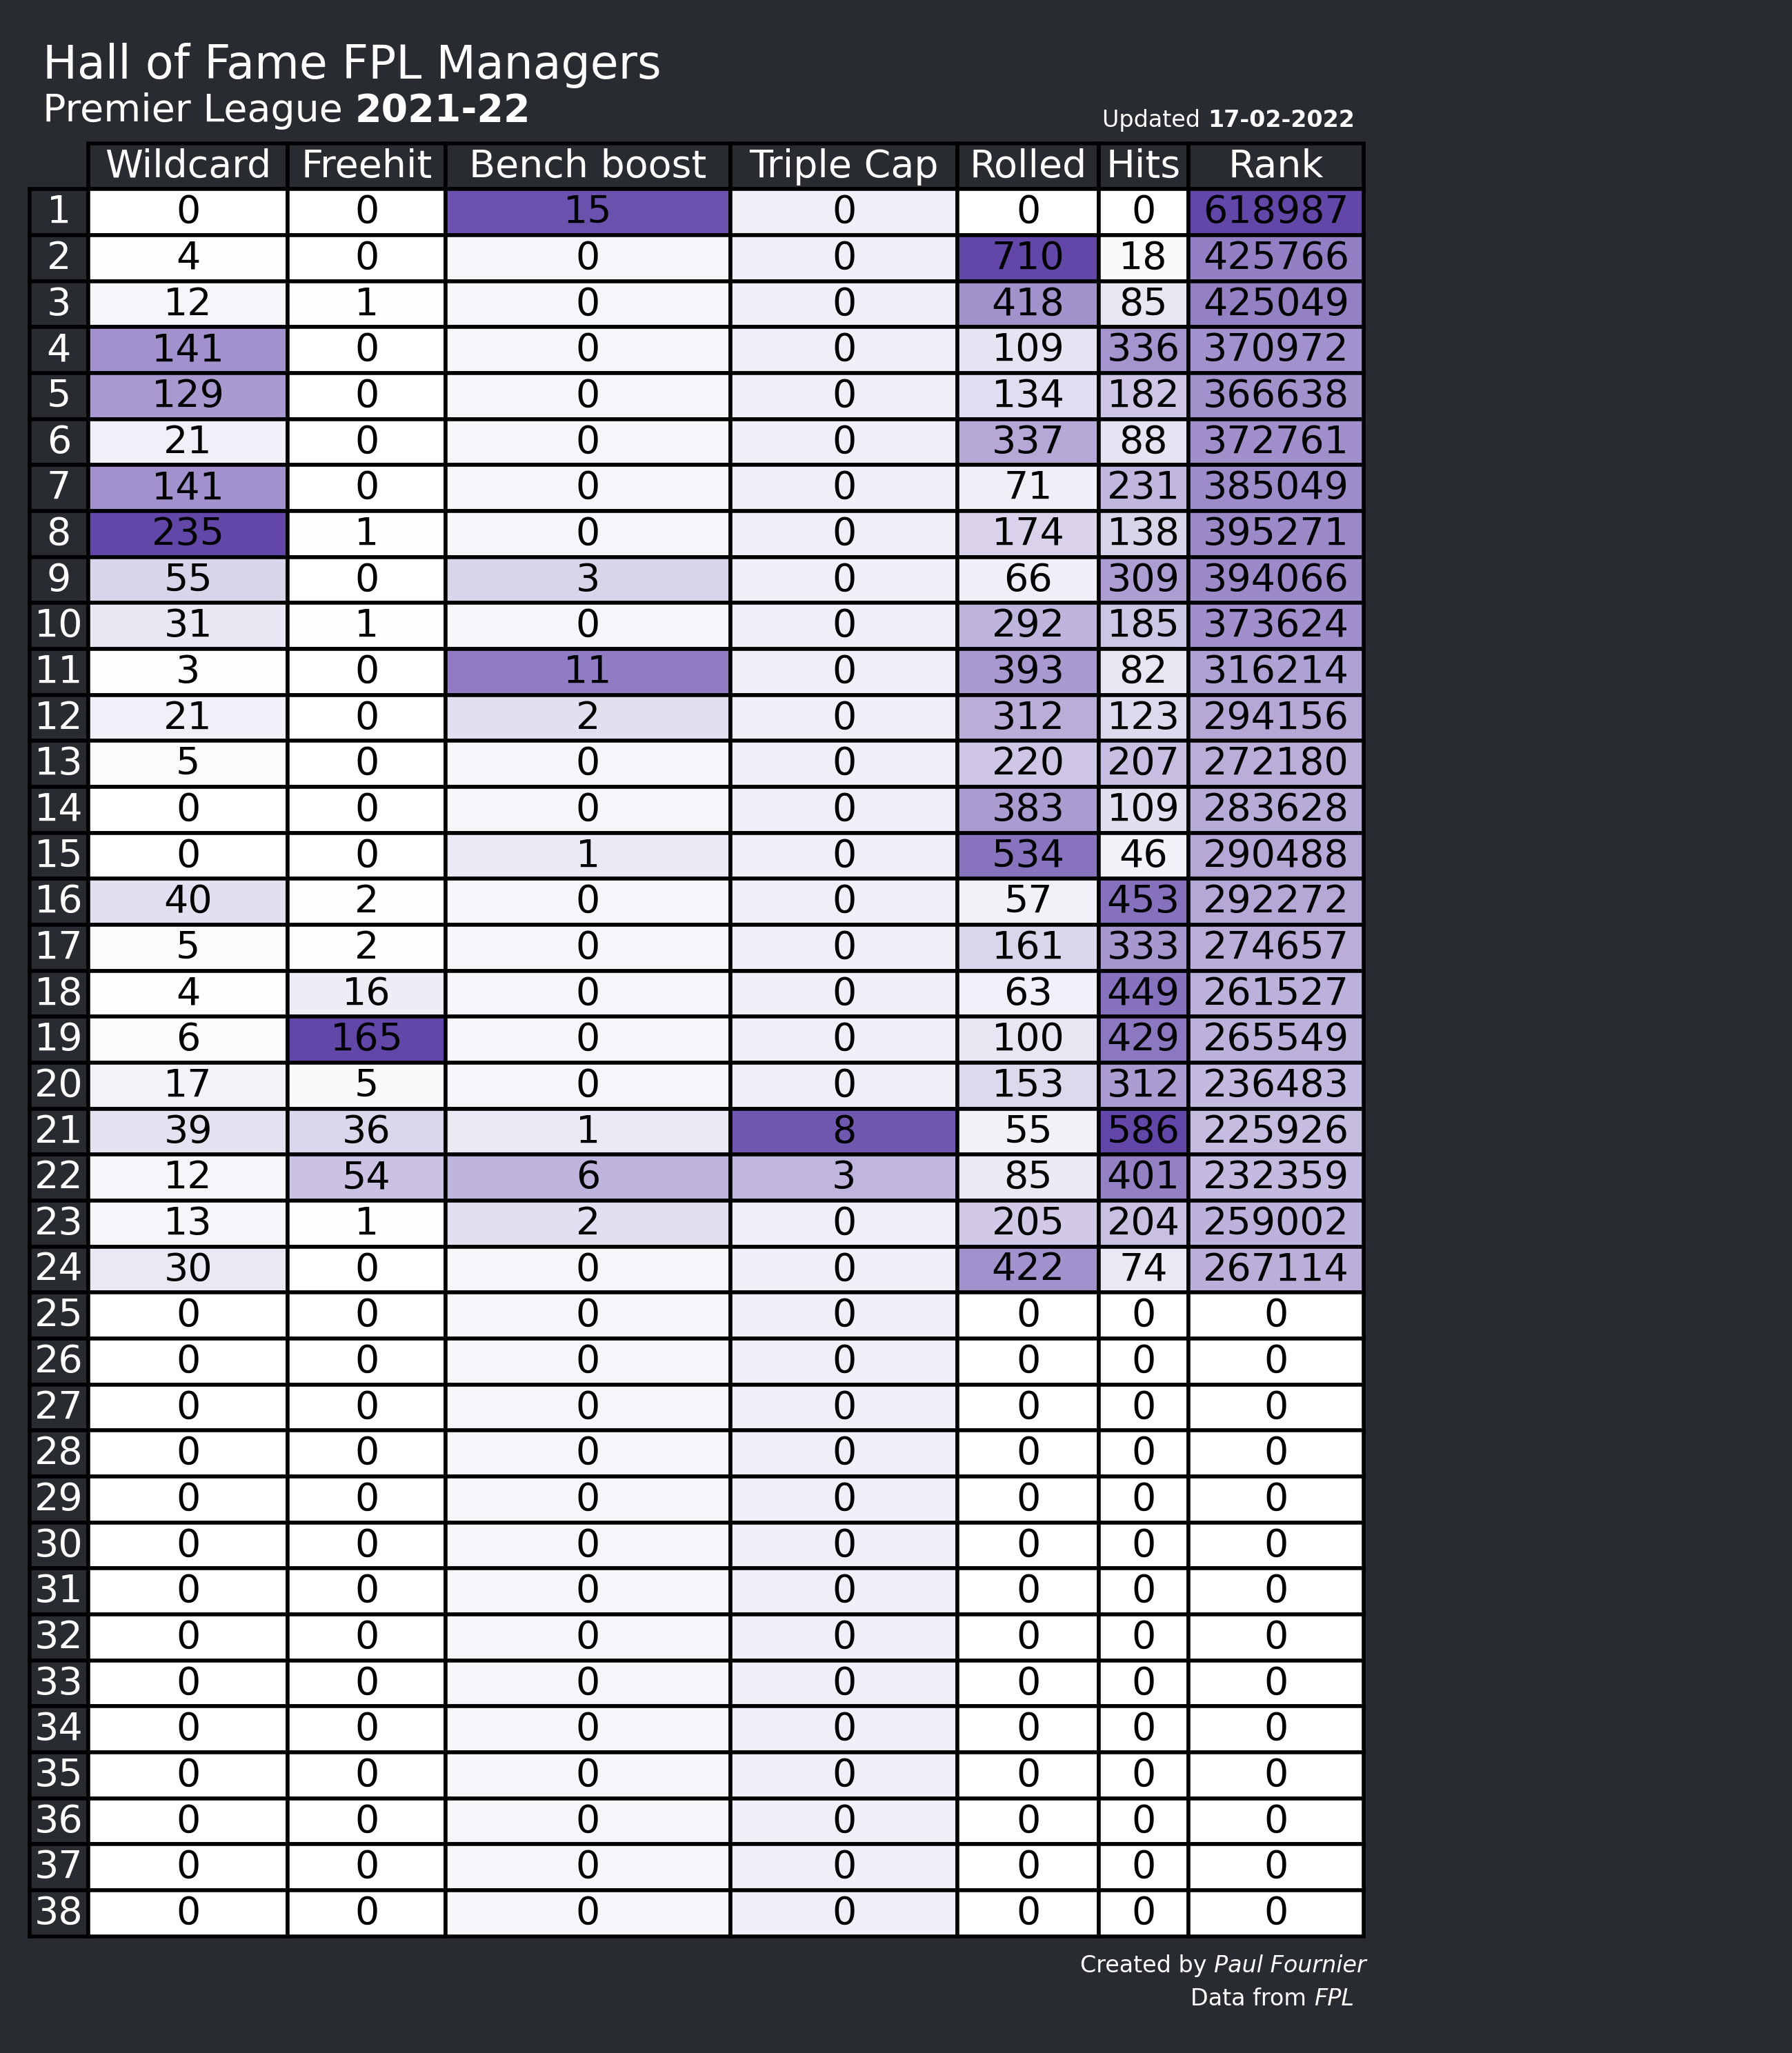

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

column_headers = table.columns
row_headers = table.index

background_rgb = [40/255, 43/255, 47/255, 1]
ccolors = np.repeat([background_rgb], len(column_headers), 0)
rcolors = np.repeat([background_rgb], len(row_headers), 0)

cell_text = []
for row in table.values:
    cell_text.append([f'{x}' for x in row])

the_table = ax.table(
    cellText=cell_text,
    cellColours=colours,
    rowLabels=row_headers,
    rowColours=rcolors,
    rowLoc='center',
    colColours=ccolors,
    colLabels=column_headers,
    loc='center left',
    fontsize=10,
    cellLoc = 'center'
    )

for i in table.index:
    for j, _ in enumerate(table.columns):
        the_table[(i, j)].get_text().set_color('black')

the_table.auto_set_column_width(col=list(range(len(table.columns))))
the_table.auto_set_font_size()

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)

fig_text(
    x=0.12, y=1.105,
    s="Hall of Fame FPL Managers",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.12, y=1.075,
    s="Premier League <2021-22>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=10, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.6, y=1.065,
    s="Updated <17-02-2022>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=6, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.59, y=-0.05,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

fig_text(
    x=0.64, y=-0.07,
    s="Data from <FPL>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()